In [188]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [189]:
df=pd.read_csv(R"D:\16_MACHINE_LEARNING\02_MACHINE_LEARNING_USING_PYTHON\placement_cgpa_pcakge.csv")

In [190]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


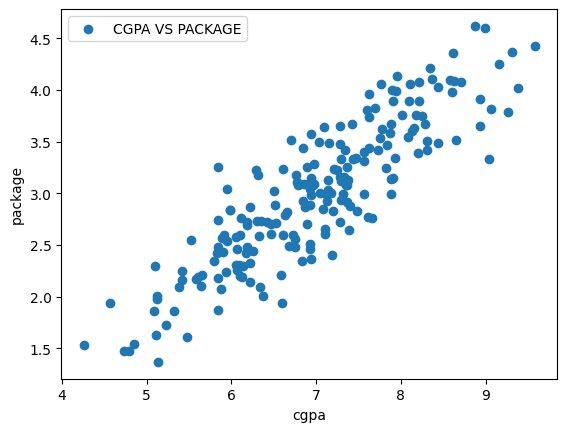

In [191]:
plt.scatter(df['cgpa'],df['package'],label="CGPA VS PACKAGE")
plt.xlabel("cgpa")
plt.ylabel("package")
plt.legend()
plt.show()

In [192]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [193]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [194]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

## USING SCIKIT LEARN

In [196]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [197]:
y_pred=lr.predict(X_test)

In [198]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [199]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

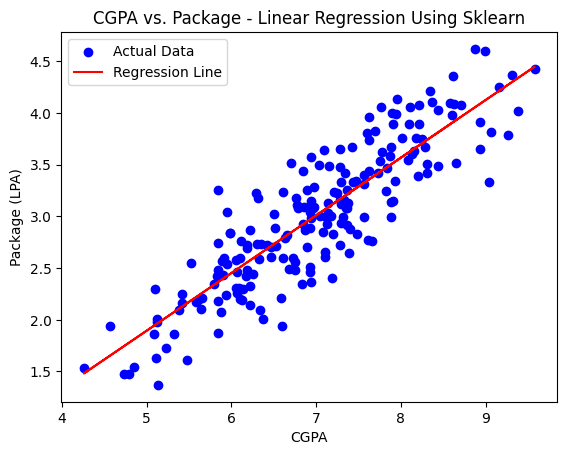

In [200]:
plt.scatter(df['cgpa'], df['package'], color='blue', label='Actual Data')
plt.plot(X_train, lr.predict(X_train), color='red', label='Regression Line')
plt.xlabel("CGPA")  
plt.ylabel("Package (LPA)")  
plt.title("CGPA vs. Package - Linear Regression Using Sklearn")  
plt.legend()  
plt.show()


In [201]:
lr.coef_

array([0.55795197])

In [202]:
lr.intercept_

np.float64(-0.8961119222429144)

In [203]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
print("R2 SCORE :",r2_score(y_test,y_pred))
print("MEAN ABSOLUTE ERROR :",mean_absolute_error(y_test,y_pred))
print("MEAN SQUARED ERROR  :",mean_squared_error(y_test,y_pred))
print("ROOT MEAN SQUARED ERROR  :",root_mean_squared_error(y_test,y_pred))

R2 SCORE : 0.780730147510384
MEAN ABSOLUTE ERROR : 0.2884710931878175
MEAN SQUARED ERROR  : 0.12129235313495527
ROOT MEAN SQUARED ERROR  : 0.34827051717731616


## CUSTOM IMPLEMENTATION 

In [205]:
df=pd.read_csv(R"D:\16_MACHINE_LEARNING\02_MACHINE_LEARNING_USING_PYTHON\placement_cgpa_pcakge.csv")
X=df.iloc[:,0].values
y=df.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [206]:
import numpy as np

class MeraLR:
    def __init__(self):
        self.m = None  # Slope
        self.b = None  # Intercept

    def fit(self, X_train, y_train):
        X_train = X_train.flatten() 
        y_train = y_train.flatten()

        X_mean = X_train.mean()
        y_mean = y_train.mean()

        num = np.sum((X_train - X_mean) * (y_train - y_mean))  # Numerator
        den = np.sum((X_train - X_mean) ** 2)  # Denominator

        self.m = num / den
        self.b = y_mean - self.m * X_mean
        return self.m, self.b
        
    def predict(self, X_test):
        X_test = X_test.flatten()  
        return self.m * X_test + self.b  # Vectorized computation


In [207]:
lr=MeraLR()


In [208]:
y_train

array([3.13, 3.91, 2.25, 2.3 , 4.06, 3.18, 2.7 , 2.49, 3.15, 2.99, 4.08,
       4.14, 2.6 , 2.44, 2.71, 2.72, 1.63, 2.31, 2.51, 3.5 , 2.24, 2.58,
       2.42, 2.54, 4.37, 2.17, 3.14, 2.19, 3.54, 1.54, 2.72, 3.98, 2.46,
       3.  , 1.98, 2.65, 3.75, 3.67, 2.93, 3.08, 2.21, 2.84, 3.76, 3.03,
       2.09, 3.26, 2.16, 2.7 , 3.83, 2.88, 3.16, 3.04, 3.13, 3.04, 4.6 ,
       3.26, 2.85, 2.09, 3.31, 3.89, 1.87, 3.11, 2.4 , 3.48, 3.08, 2.76,
       2.93, 3.39, 2.35, 3.08, 2.14, 3.24, 1.73, 3.24, 3.44, 2.69, 3.33,
       2.42, 2.57, 3.55, 2.66, 1.53, 2.98, 2.84, 3.52, 3.16, 3.82, 2.6 ,
       1.61, 2.2 , 2.99, 3.12, 2.74, 2.83, 2.77, 2.35, 2.19, 3.42, 4.02,
       3.89, 3.15, 3.99, 3.42, 3.08, 2.46, 2.61, 3.49, 3.76, 2.82, 4.03,
       2.99, 2.73, 2.18, 3.09, 3.96, 2.1 , 3.33, 4.62, 3.47, 2.48, 4.43,
       4.11, 3.44, 3.18, 3.02, 4.06, 2.26, 1.48, 2.94, 2.89, 2.72, 3.09,
       2.73, 4.36, 3.  , 3.79, 2.59, 2.87, 3.57, 1.37, 3.6 , 2.43, 3.33,
       2.31, 3.4 , 3.89, 4.25, 3.26, 3.67, 2.79, 3.

In [209]:
lr.fit(X_train,y_train)

(np.float64(0.557951973425072), np.float64(-0.8961119222429144))

In [210]:
y_pred=lr.predict(X_test)

In [211]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [212]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

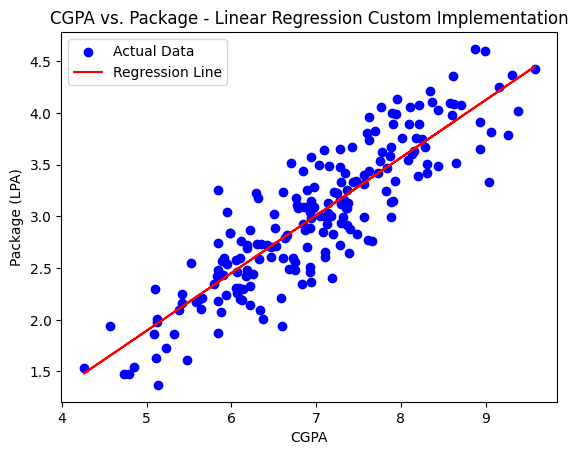

In [213]:
plt.scatter(df['cgpa'], df['package'], color='blue', label='Actual Data')
plt.plot(X_train, lr.predict(X_train), color='red', label='Regression Line')
plt.xlabel("CGPA")  
plt.ylabel("Package (LPA)")  
plt.title("CGPA vs. Package - Linear Regression Custom Implementation")  
plt.legend()  
plt.show()


In [214]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
print("R2 SCORE :",r2_score(y_test,y_pred))
print("MEAN ABSOLUTE ERROR :",mean_absolute_error(y_test,y_pred))
print("MEAN SQUARED ERROR  :",mean_squared_error(y_test,y_pred))
print("ROOT MEAN SQUARED ERROR  :",root_mean_squared_error(y_test,y_pred))

R2 SCORE : 0.780730147510384
MEAN ABSOLUTE ERROR : 0.2884710931878175
MEAN SQUARED ERROR  : 0.12129235313495527
ROOT MEAN SQUARED ERROR  : 0.34827051717731616


In [ ]:
cascasc